<a href="https://colab.research.google.com/github/surajgazi100/Data_science_Fundamentals/blob/main/JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JSON stands

 for “JavaScript Object Notation” and is a simple and well-known data format. It's easy for humans to read and write — once you get used to the brackets. Also, it's supported natively by every major programming language. JSON type was built on two data structures: Objects — a collection of key/value pairs.

But what is JSON?

Good question. JSON stands for “JavaScript Object Notation” and is a simple and well-known data format. It’s easy for humans to read and write — once you get used to the brackets. Also, it’s supported natively by every major programming language.

JSON type was built on two data structures:

Objects — a collection of key/value pairs
Arrays — lists of values

And is dead simple to use.
This is a no BS article and the goal is to get your hands dirty ASAP. We’ll 
connect to an actual API in a minute, and then cover the basics. Later you’ll see what’s my favorite JSON functionality, data-science-wise.
Let’s start.


API connection
Fire up the Notebook environment if you haven’t already. We’ll be using only the requests library for now:

In [1]:
import requests

Let’s explore the API first. It can be found on this link and contains dummy data on some users. Perfect for our needs.
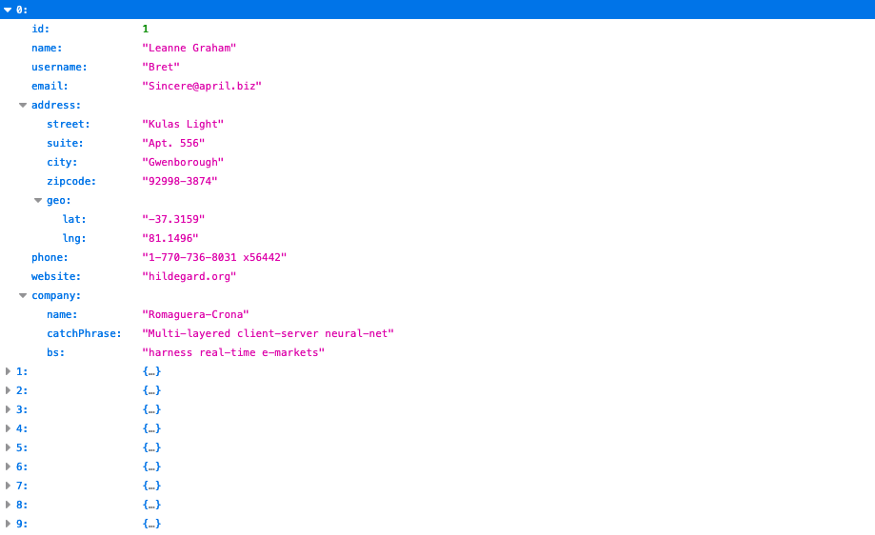

Let’s load it in, shall we? The process is straightforward, as with most of the things in Python:

In [ ]:
req = requests.get(‘https://jsonplaceholder.typicode.com/users')
req

This 200 status code means that the request has succeeded and we’re ready to work on data. Let’s store JSON data into a separate variable:

In [ ]:
users = req.json()
users[0]

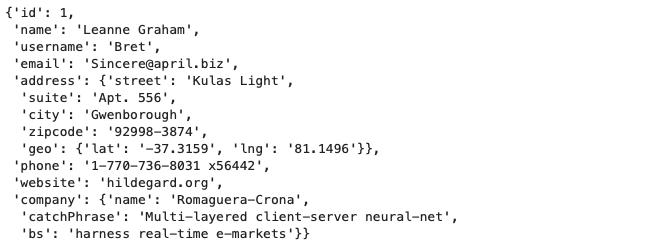

Did you see how easy that was?

Let’s now take a look at the users variable. I’ve made a point that JSON was built on two structures — objects and arrays — let’s see if that claim holds true:

In [ ]:
type(users)
>>> list
type(users[0])
>>> dict

It holds — as lists and arrays are synonyms (ish), and dictionaries can be interpreted as objects. Saving and loading JSON data is covered next.


Saving and loading data
We can use pure Python functionalities to save and read JSON data. Here’s how to approach the saving part:

In [ ]:
import json
with open(‘json_write_test.json’, ‘w’) as f:
    json.dump(users, f, indent=4)

The indent parameter is optional, and it represents how large a single tab should be. Quite similar to the 4 space indentation syntax with Python. We can verify that the file was actually saved:
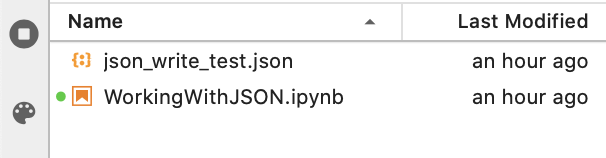

The reading process is very similar — we only need to change from write mode to read mode and use load() function instead of dump():

In [ ]:
with open(‘json_write_test.json’) as f:
    data = json.load(f)

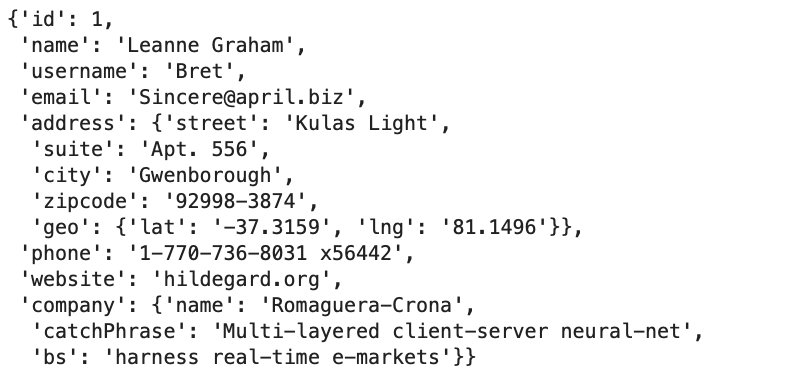

Working with JSON

This will be a short section. Why? Because working with JSON is just like working with Python dictionaries. Let me elaborate.

JSON data is not by default an array of Python dictionaries. But becomes just that once when loaded into Python. For that reason, we can treat JSON data as a list of dictionaries.

Here’s an example: we want to print the name and the full address for each user, without the zip code. It’s stupidly simple to do:


In [ ]:
for row in users:
    print(f”Address of {row[‘name’]} is {row[‘address’][‘street’]} {row[‘address’][‘suite’]}, {row[‘address’][‘city’]}”)

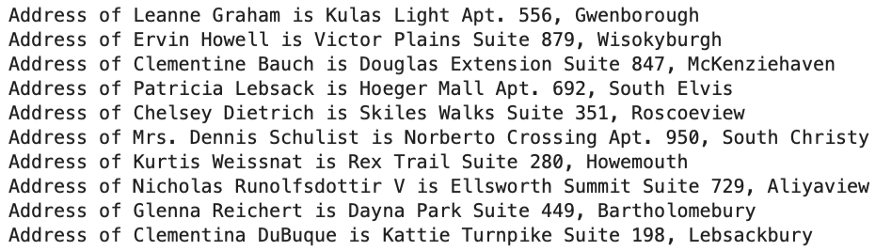

It looks a bit messy in the article, but just copy the code over to your notebook. You’ll immediately get the gist of it. And that’s you should know. The next section covers my favorite way of handling JSON — data-science-wise.


JSON flattening

JSON data can sometimes be problematic to read with libraries like Pandas. If there’s no nesting (objects within objects ) than everything should be fine. Most of the real-world data is nested, and we need to address this somehow.
Here’s what would happen upon loading our JSON data into a Pandas DataFrame:

In [ ]:
pd_data = pd.DataFrame(data)
pd_data.head()

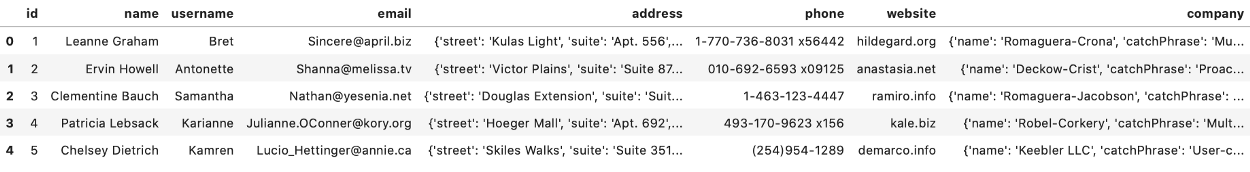

Looks good until the address column, where the address itself is split on street, suite, city, and zip code. The same applies to the company column.


But how can we address this issue?


I’ve used custom libraries for JSON flattening some time ago, but on several occasions they didn’t work as advertised. That’s why I’ve come up with this function, with a bit of help from Stack Overflow:

In [ ]:
def flatten_json(json):
    output = {}
 
    def flatten(inpt, name=’’):
        if type(inpt) is dict:
            for elem in inpt:
                flatten(inpt[elem], name + elem + ‘_’)
        elif type(inpt) is list:
            i = 0
            for elem in inpt:
                flatten(elem, name + str(i) + ‘_’)
                i += 1
        else:
            output[name[:-1]] = inpt
 
    flatten(json)
    return output

The function is pretty much self-explanatory and must be applied to every row of your data. If you have an array of 100 JSON objects, you cannot just apply the function to the array itself, but instead to every array item. Here’s how:

In [ ]:
flattened = [flatten_json(row) for row in data]

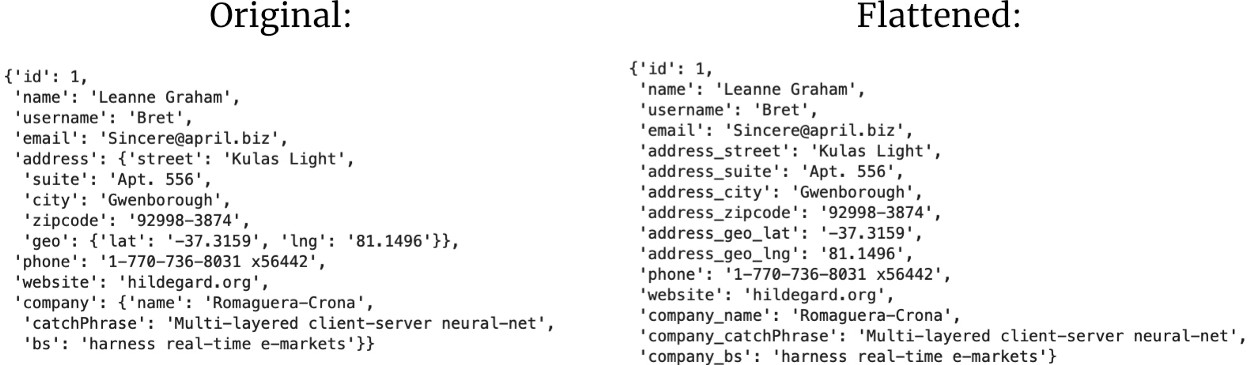

Pay attention to how there is no indentation in the flattened data, and how all previously nested elements have the prefix now.
The process of conversion to Pandas DataFrame now works as expected:


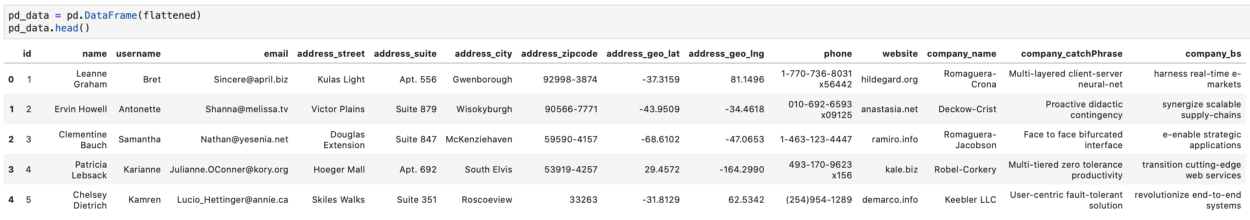

Before you leave

The majority of APIs I’ve worked with return data either in JSON or in XML — it’s for you to pick. JSON is much simpler to work with, at least in Python.
You can also store JSON in databases:

In LOB format for SQL databases
In “raw” format for NoSQL databases
but that’s a story for another time.
 Thanks for reading — I hope it was useful to you.